In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from PIL import Image

# Define the year and load the data
YEAR = 2024
url = f'https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_{YEAR}.csv.gz'
data = pd.read_csv(url, compression='gzip', low_memory=False)

# Set options for displaying dataframes
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)

data.head(200)
# Manual filters start here
filtered_df = data[(data['home_team'] == 'MIA') | (data['away_team'] == 'MIA')] ### change team

# Separate filters for passing and rushing plays
passing_plays = filtered_df[filtered_df['passer_player_name'] == 'T.Tagovailoa'] ### change qb
rushing_plays = filtered_df[filtered_df['rusher_player_name'] == 'T.Tagovailoa'] ### change qb

# Filter game data by game id
game_data_passing = passing_plays[passing_plays['game_id'] == '2024_02_BUF_MIA'] ### follow format YEAR_WEEK_AWAY_HOME 2023_12_BUF_PHI
game_data_rushing = rushing_plays[rushing_plays['game_id'] == '2024_02_BUF_MIA']
# Set options for displaying dataframes
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
print(passing_plays.columns)

# # Filter game data by game id
# game_data_passing = passing_plays[passing_plays['game_id'] == '2024_01_IND_HOU'] ### follow format YEAR_WEEK_AWAY_HOME 2023_12_BUF_PHI
data.head(100000)

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'out_of_bounds', 'home_opening_kickoff', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd',
       'xpass', 'pass_oe'],
      dtype='object', length=372)


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sportsdataverse.cfb import load_cfb_pbp

# Define the year and load the CFB data
YEAR = 2021
data = load_cfb_pbp(seasons=[YEAR], return_as_pandas=True)

# Set options for displaying dataframes
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)
data.head()

100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


,id,sequenceNumber,text,awayScore,homeScore,scoringPlay,priority,modified,wallclock,statYardage,type.id,type.text,type.abbreviation,period.number,clock.displayValue,start.down,start.distance,start.yardLine,start.yardsToEndzone,start.team.id,end.down,end.distance,end.yardLine,end.yardsToEndzone,end.downDistanceText,end.shortDownDistanceText,end.possessionText,end.team.id,start.downDistanceText,start.shortDownDistanceText,start.possessionText,mediaId,scoringType.name,scoringType.displayName,scoringType.abbreviation,drive.id,drive.displayResult,drive.isScore,drive.team.shortDisplayName,drive.team.displayName,drive.team.name,drive.team.abbreviation,drive.yards,drive.offensivePlays,drive.result,drive.description,drive.shortDisplayResult,drive.timeElapsed.displayValue,drive.start.period.number,drive.start.period.type,drive.start.yardLine,drive.start.clock.displayValue,drive.start.text,drive.end.period.number,drive.end.period.type,drive.end.yardLine,drive.end.clock.displayValue,game_id,season,seasonType,homeTeamId,awayTeamId,homeTeamName,awayTeamName,homeTeamMascot,awayTeamMascot,homeTeamAbbrev,awayTeamAbbrev,homeTeamNameAlt,awayTeamNameAlt,homeTeamSpread,gameSpread,gameSpreadAvailable,overUnder,homeFavorite,clock.minutes,clock.seconds,half,lag_half,lead_half,start.TimeSecsRem,start.adj_TimeSecsRem,game_play_number,start.pos_team.id,start.def_pos_team.id,end.def_team.id,end.pos_team.id,end.def_pos_team.id,start.pos_team.name,start.def_pos_team.name,end.pos_team.name,end.def_pos_team.name,start.is_home,end.is_home,homeTimeoutCalled,awayTimeoutCalled,end.homeTeamTimeouts,end.awayTeamTimeouts,start.homeTeamTimeouts,start.awayTeamTimeouts,end.TimeSecsRem,end.adj_TimeSecsRem,start.posTeamTimeouts,start.defPosTeamTimeouts,end.posTeamTimeouts,end.defPosTeamTimeouts,firstHalfKickoffTeamId,period,start.yard,end.yard,playType,week,lag_scoringPlay,end_of_half,down_1,down_2,down_3,down_4,down_1_end,down_2_end,down_3_end,down_4_end,scoring_play,td_play,touchdown,td_check,safety,fumble_vec,forced_fumble,kickoff_play,kickoff_tb,kickoff_onside,kickoff_oob,kickoff_fair_catch,kickoff_downed,kick_play,kickoff_safety,punt,punt_play,punt_tb,punt_oob,punt_fair_catch,punt_downed,punt_safety,penalty_safety,punt_blocked,rush,pass,sack_vec,pos_team,def_pos_team,is_home,lag_HA_score_diff,HA_score_diff,net_HA_score_pts,H_score_diff,A_score_diff,lag_homeScore,lag_awayScore,start.homeScore,start.awayScore,end.homeScore,end.awayScore,pos_team_score,def_pos_team_score,start.pos_team_score,start.def_pos_team_score,start.pos_score_diff,end.pos_team_score,end.def_pos_team_score,end.pos_score_diff,lag_pos_team,lead_pos_team,lead_pos_team2,pos_score_diff,lag_pos_score_diff,pos_score_pts,pos_score_diff_start,start.pos_team_receives_2H_kickoff,end.pos_team_receives_2H_kickoff,change_of_poss,penalty_flag,penalty_declined,penalty_no_play,penalty_offset,penalty_1st_conv,penalty_in_text,penalty_detail,penalty_text,yds_penalty,sack,int,int_td,completion,pass_attempt,target,pass_breakup,pass_td,rush_td,turnover_vec,offense_score_play,defense_score_play,downs_turnover,yds_punted,yds_punt_gained,fg_attempt,fg_made,yds_fg,pos_unit,def_pos_unit,lead_play_type,sp,play,scrimmage_play,change_of_pos_team,pos_score_diff_end,fumble_lost,fumble_recovered,yds_rushed,yds_receiving,yds_int_return,yds_kickoff,yds_kickoff_return,yds_punt_return,yds_fumble_return,yds_sacked,sack_players,rush_player_name,receiver_player_name,passer_player_name,sack_player_name,sack_player_name2,interception_player_name,pass_breakup_player_name,fg_kicker_player_name,fg_return_player_name,fg_block_player_name,punter_player_name,punt_return_player_name,punt_block_player_name,punt_block_return_player_name,kickoff_player_name,kickoff_return_player_name,fumble_player_name,fumble_forced_player_name,fumble_recovered_player_name,rusher_player_name,new_down,new_distance,middle_8,rz_play,scoring_opp,stuffed_run,stopped_run,opportunity_run,highlight_run,adj_rush_yardage,line_yards,second_level_yards,open_field_yards,highlig

In [90]:
from sportsdataverse.cfb.cfb_pbp import CFBPlayProcess
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)

processed_data = CFBPlayProcess(gameId=401634299)
pbp = processed_data.espn_cfb_pbp()

# Convert the 'scoringPlays' list to a DataFrame
if 'scoringPlays' in pbp:
    df_scoring_plays = pd.DataFrame(pbp['scoringPlays'])
    print("Scoring Plays DataFrame:")
    print(df_scoring_plays.head())

# Similarly, you can convert the 'winprobability' list to a DataFrame
if 'winprobability' in pbp:
    df_win_prob = pd.DataFrame(pbp['winprobability'])
    print("\nWin Probability DataFrame:")
    print(df_win_prob.head())

# Flatten the nested JSON columns
df_scoring_plays_flat = pd.concat([
    df_scoring_plays.drop(['type', 'period', 'clock', 'team', 'scoringType'], axis=1),
    df_scoring_plays['type'].apply(pd.Series).add_prefix('type_'),
    df_scoring_plays['period'].apply(pd.Series).add_prefix('period_'),
    df_scoring_plays['clock'].apply(pd.Series).add_prefix('clock_'),
    df_scoring_plays['team'].apply(pd.Series).add_prefix('team_'),
    df_scoring_plays['scoringType'].apply(pd.Series).add_prefix('scoringType_')
], axis=1)

# Remove any remaining lists (like 'team_links' and 'team_logos') if not needed
df_scoring_plays_flat = df_scoring_plays_flat.drop(['team_links', 'team_logos'], axis=1, errors='ignore')

# Display the fully flattened DataFrame
print(df_scoring_plays_flat)


Scoring Plays DataFrame:
                   id                                               type  \
0  401634299101944401  {'id': '67', 'text': 'Passing Touchdown', 'abb...   
1  401634299101976001  {'id': '67', 'text': 'Passing Touchdown', 'abb...   
2  401634299101999401  {'id': '67', 'text': 'Passing Touchdown', 'abb...   
3  401634299102879601  {'id': '67', 'text': 'Passing Touchdown', 'abb...   
4  401634299103919901  {'id': '59', 'text': 'Field Goal Good', 'abbre...   

                                                text  awayScore  homeScore  \
0  Jake Young 8 Yd pass from Cole Gonzales (Chris...          7          0   
1  Kevin Concepcion 17 Yd pass from Grayson McCal...          7          7   
2  AJ Colombo 12 Yd pass from Cole Gonzales (Chri...         14          7   
3  Kevin Concepcion 5 Yd pass from Grayson McCall...         14         14   
4                 Kanoah Vinesett 46 Yd Field Goal           14         17   

          period                                 

Week 1 2023: Passing TDs = 37.0, Rushing TDs = 24.0
Week 1 2024: Passing TDs = 35.0, Rushing TDs = 36.0


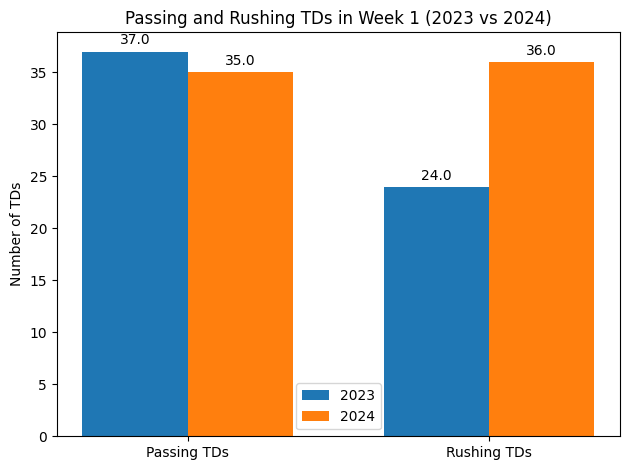

In [21]:
import pandas as pd

# Load the data for 2023 and 2024
YEAR_2023 = 2023
YEAR_2024 = 2024

url_2023 = f'https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_{YEAR_2023}.csv.gz'
url_2024 = f'https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_{YEAR_2024}.csv.gz'

# Read the data for both years
data_2023 = pd.read_csv(url_2023, compression='gzip', low_memory=False)
data_2024 = pd.read_csv(url_2024, compression='gzip', low_memory=False)

# Filter data for week 1 in 2023 and 2024
week1_2023 = data_2023[data_2023['week'] == 1]
week1_2024 = data_2024[data_2024['week'] == 1]

# Calculate the number of passing and rushing touchdowns in week 1 of 2023
passing_tds_2023 = week1_2023['pass_touchdown'].sum()
rushing_tds_2023 = week1_2023['rush_touchdown'].sum()

# Calculate the number of passing and rushing touchdowns in week 1 of 2024
passing_tds_2024 = week1_2024['pass_touchdown'].sum()
rushing_tds_2024 = week1_2024['rush_touchdown'].sum()

# Display the results
print(f"Week 1 2023: Passing TDs = {passing_tds_2023}, Rushing TDs = {rushing_tds_2023}")
print(f"Week 1 2024: Passing TDs = {passing_tds_2024}, Rushing TDs = {rushing_tds_2024}")


import matplotlib.pyplot as plt

# Bar chart for passing and rushing touchdowns
labels = ['Passing TDs', 'Rushing TDs']
week_1_2023 = [passing_tds_2023, rushing_tds_2023]
week_1_2024 = [passing_tds_2024, rushing_tds_2024]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
bar_2023 = ax.bar(x - width/2, week_1_2023, width, label='2023')
bar_2024 = ax.bar(x + width/2, week_1_2024, width, label='2024')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Number of TDs')
ax.set_title('Passing and Rushing TDs in Week 1 (2023 vs 2024)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the values on top of the bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bar_2023)
add_values(bar_2024)

# Show the plot
plt.tight_layout()
plt.show()


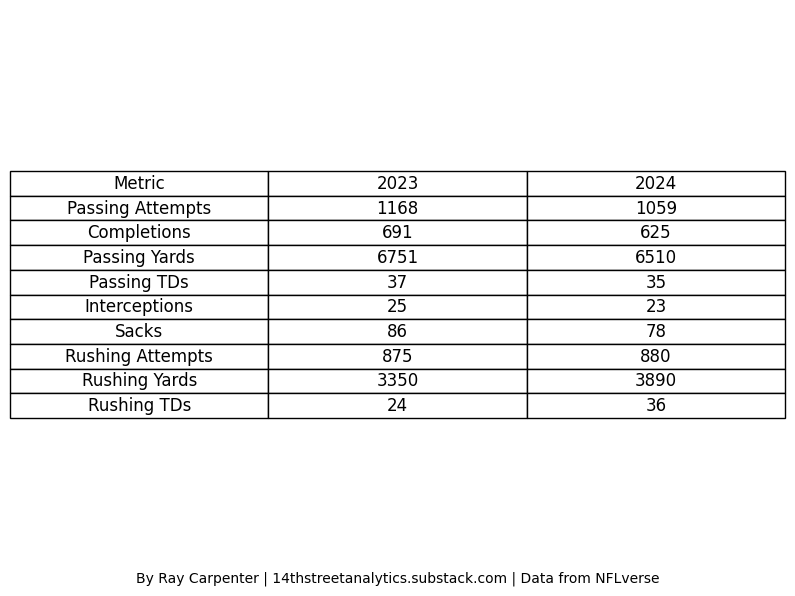

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the sums for week 1 of 2023
passing_yards_2023 = int(week1_2023['passing_yards'].sum())
passing_attempts_2023 = int(week1_2023['pass_attempt'].sum())
passing_completions_2023 = int(week1_2023['complete_pass'].sum())
passing_tds_2023 = int(week1_2023['pass_touchdown'].sum())
passing_interceptions_2023 = int(week1_2023['interception'].sum())
sacks_2023 = int(week1_2023['sack'].sum())
rushing_attempts_2023 = int(week1_2023['rush_attempt'].sum())
rushing_yards_2023 = int(week1_2023['rushing_yards'].sum())
rushing_tds_2023 = int(week1_2023['rush_touchdown'].sum())

# Calculate the sums for week 1 of 2024
passing_yards_2024 = int(week1_2024['passing_yards'].sum())
passing_attempts_2024 = int(week1_2024['pass_attempt'].sum())
passing_completions_2024 = int(week1_2024['complete_pass'].sum())
passing_tds_2024 = int(week1_2024['pass_touchdown'].sum())
passing_interceptions_2024 = int(week1_2024['interception'].sum())
sacks_2024 = int(week1_2024['sack'].sum())
rushing_attempts_2024 = int(week1_2024['rush_attempt'].sum())
rushing_yards_2024 = int(week1_2024['rushing_yards'].sum())
rushing_tds_2024 = int(week1_2024['rush_touchdown'].sum())

# Create the summary table for display
summary_table = {
    'Metric': ['Passing Attempts', 'Completions', 'Passing Yards', 'Passing TDs', 'Interceptions', 'Sacks',
               'Rushing Attempts', 'Rushing Yards', 'Rushing TDs'],
    '2023': [passing_attempts_2023, passing_completions_2023, passing_yards_2023, passing_tds_2023, passing_interceptions_2023, 
             sacks_2023, rushing_attempts_2023, rushing_yards_2023, rushing_tds_2023],
    '2024': [passing_attempts_2024, passing_completions_2024, passing_yards_2024, passing_tds_2024, passing_interceptions_2024, 
             sacks_2024, rushing_attempts_2024, rushing_yards_2024, rushing_tds_2024]
}

# Convert the summary table to a pandas DataFrame for better display formatting
summary_df = pd.DataFrame(summary_table)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 6))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Footer
plt.figtext(0.5, 0.02, 'By Ray Carpenter | 14thstreetanalytics.substack.com | Data from NFLverse', 
            ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


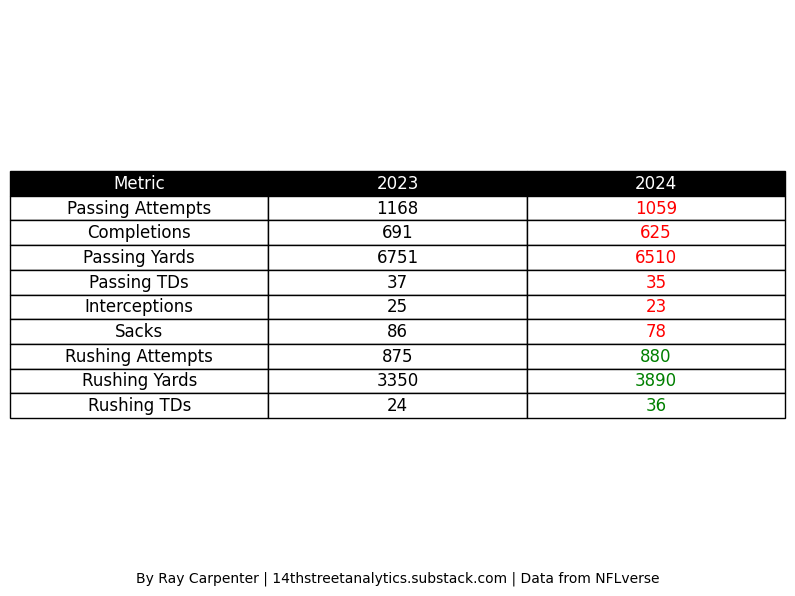

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the summary table with values
summary_table = {
    'Metric': ['Passing Attempts', 'Completions', 'Passing Yards', 'Passing TDs', 'Interceptions', 'Sacks',
               'Rushing Attempts', 'Rushing Yards', 'Rushing TDs'],
    '2023': [passing_attempts_2023, passing_completions_2023, passing_yards_2023, passing_tds_2023, passing_interceptions_2023, 
             sacks_2023, rushing_attempts_2023, rushing_yards_2023, rushing_tds_2023],
    '2024': [passing_attempts_2024, passing_completions_2024, passing_yards_2024, passing_tds_2024, passing_interceptions_2024, 
             sacks_2024, rushing_attempts_2024, rushing_yards_2024, rushing_tds_2024]
}

# Convert the summary table to a pandas DataFrame
summary_df = pd.DataFrame(summary_table)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 6))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Set black background with white font for the header row
for key, cell in table.get_celld().items():
    if key[0] == 0:  # The header row (index 0)
        cell.set_text_props(color="white")
        cell.set_facecolor("black")

# Apply conditional formatting to 2024 column
for i in range(1, len(summary_df) + 1):  # Skip the header row
    value_2023 = summary_df.at[i - 1, '2023']
    value_2024 = summary_df.at[i - 1, '2024']

    if value_2024 < value_2023:
        table[(i, 2)].set_text_props(color='red')  # 2024 column becomes red if lower
    else:
        table[(i, 2)].set_text_props(color='green')  # 2024 column becomes green if higher

# Footer
plt.figtext(0.5, 0.02, 'By Ray Carpenter | 14thstreetanalytics.substack.com | Data from NFLverse', 
            ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming week2_2023 and week2_2024 datasets are already loaded
# Filter the datasets to calculate sacks for the Dolphins and Eagles
dolphins_sacks_2023 = int(week2_2023[week2_2023['team'] == 'Miami Dolphins']['sack'].sum())
eagles_sacks_2024 = int(week2_2024[week2_2024['team'] == 'Philadelphia Eagles']['sack'].sum())

# Create the summary table for Dolphins vs. Eagles sacks comparison
sack_summary_table = {
    'Team': ['Miami Dolphins (2023)', 'Philadelphia Eagles (2024)'],
    'Total Sacks': [dolphins_sacks_2023, eagles_sacks_2024]
}

# Convert the sack summary table to a pandas DataFrame
sack_summary_df = pd.DataFrame(sack_summary_table)

# Plot the table
fig, ax = plt.subplots(figsize=(6, 4))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=sack_summary_df.values, colLabels=sack_summary_df.columns, cellLoc='center', loc='center')

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Footer
plt.figtext(0.5, 0.02, 'By Ray Carpenter | 14thstreetanalytics.substack.com | Data from NFLverse', 
            ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'week2_2023' is not defined

           Team  Total Sacks  Total QB Hits  Total Pressures
0    Eagles '24            1              2                3
1  Dolphins '23            4              8               12
2   Broncos '21            1              3                4
3   Broncos '20            1              3                4
4   Broncos '19            0              2                2
5     Bears '18            4              6               10


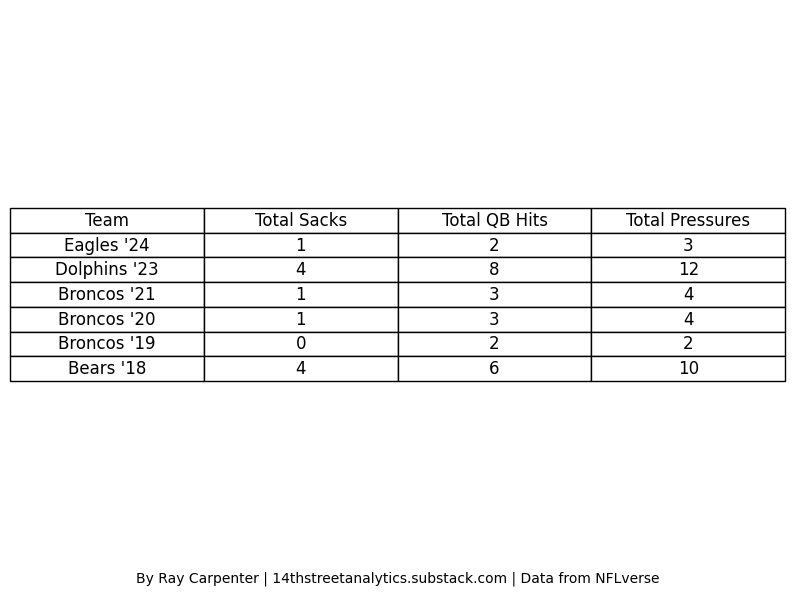

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data for each year
YEAR_2023 = 2023
YEAR_2024 = 2024
YEAR_2021 = 2021
YEAR_2020 = 2020
YEAR_2019 = 2019
YEAR_2018 = 2018

url_2023 = f'https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_{YEAR_2023}.csv.gz'
url_2024 = f'https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_{YEAR_2024}.csv.gz'
url_2021 = f'https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_{YEAR_2021}.csv.gz'
url_2020 = f'https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_{YEAR_2020}.csv.gz'
url_2019 = f'https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_{YEAR_2019}.csv.gz'
url_2018 = f'https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_{YEAR_2018}.csv.gz'

# Read the data for all years
data_2023 = pd.read_csv(url_2023, compression='gzip', low_memory=False)
data_2024 = pd.read_csv(url_2024, compression='gzip', low_memory=False)
data_2021 = pd.read_csv(url_2021, compression='gzip', low_memory=False)
data_2020 = pd.read_csv(url_2020, compression='gzip', low_memory=False)
data_2019 = pd.read_csv(url_2019, compression='gzip', low_memory=False)
data_2018 = pd.read_csv(url_2018, compression='gzip', low_memory=False)

# Filter the data for week 2 (or week 1 in case of Bears 2018)
week2_2023 = data_2023[data_2023['week'] == 2]
week2_2024 = data_2024[data_2024['week'] == 2]
week2_2021 = data_2021[data_2021['week'] == 2]
week2_2020 = data_2020[data_2020['week'] == 2]
week2_2019 = data_2019[data_2019['week'] == 2]
week1_2018 = data_2018[data_2018['week'] == 1]  # For 2018 Bears, only Week 1 data available

# Calculate total sacks and QB hits for each team and year
# Miami Dolphins (2023)
dolphins_sacks_2023 = int(week2_2023[week2_2023['defteam'] == 'MIA']['sack'].sum())
dolphins_qb_hits_2023 = int(week2_2023[week2_2023['defteam'] == 'MIA']['qb_hit'].sum())
dolphins_pressures_2023 = dolphins_sacks_2023 + dolphins_qb_hits_2023

# Philadelphia Eagles (2024)
eagles_sacks_2024 = int(week2_2024[week2_2024['defteam'] == 'PHI']['sack'].sum())
eagles_qb_hits_2024 = int(week2_2024[week2_2024['defteam'] == 'PHI']['qb_hit'].sum())
eagles_pressures_2024 = eagles_sacks_2024 + eagles_qb_hits_2024

# Denver Broncos (2021)
broncos_sacks_2021 = int(week2_2021[week2_2021['defteam'] == 'DEN']['sack'].sum())
broncos_qb_hits_2021 = int(week2_2021[week2_2021['defteam'] == 'DEN']['qb_hit'].sum())
broncos_pressures_2021 = broncos_sacks_2021 + broncos_qb_hits_2021

# Denver Broncos (2020)
broncos_sacks_2020 = int(week2_2020[week2_2020['defteam'] == 'DEN']['sack'].sum())
broncos_qb_hits_2020 = int(week2_2020[week2_2020['defteam'] == 'DEN']['qb_hit'].sum())
broncos_pressures_2020 = broncos_sacks_2020 + broncos_qb_hits_2020

# Denver Broncos (2019)
broncos_sacks_2019 = int(week2_2019[week2_2019['defteam'] == 'DEN']['sack'].sum())
broncos_qb_hits_2019 = int(week2_2019[week2_2019['defteam'] == 'DEN']['qb_hit'].sum())
broncos_pressures_2019 = broncos_sacks_2019 + broncos_qb_hits_2019

# Chicago Bears (2018, Week 1)
bears_sacks_2018 = int(week1_2018[week1_2018['defteam'] == 'CHI']['sack'].sum())
bears_qb_hits_2018 = int(week1_2018[week1_2018['defteam'] == 'CHI']['qb_hit'].sum())
bears_pressures_2018 = bears_sacks_2018 + bears_qb_hits_2018

# Create the summary table for pressures comparison
pressure_summary_table = {
    'Team': [ "Eagles '24", "Dolphins '23",
             "Broncos '21", "Broncos '20", "Broncos '19", 
             "Bears '18"],
    'Total Sacks': [ eagles_sacks_2024, dolphins_sacks_2023,broncos_sacks_2021, broncos_sacks_2020, broncos_sacks_2019, bears_sacks_2018],
    'Total QB Hits': [ eagles_qb_hits_2024,dolphins_qb_hits_2023, broncos_qb_hits_2021, broncos_qb_hits_2020, broncos_qb_hits_2019, bears_qb_hits_2018],
    'Total Pressures': [ eagles_pressures_2024,dolphins_pressures_2023, broncos_pressures_2021, broncos_pressures_2020, broncos_pressures_2019, bears_pressures_2018]
}

# Convert the pressure summary table to a pandas DataFrame
pressure_summary_df = pd.DataFrame(pressure_summary_table)

# Display the table
print(pressure_summary_df)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 6))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=pressure_summary_df.values, colLabels=pressure_summary_df.columns, cellLoc='center', loc='center')

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Footer
plt.figtext(0.5, 0.02, 'By Ray Carpenter | 14thstreetanalytics.substack.com | Data from NFLverse', 
            ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


In [95]:
# Check the available columns in the dataset
data_2023.head()


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack